In [1]:
# Autosave work every 60 seconds

import IPython
assert IPython.version_info[0] >= 3
%autosave 60

Autosaving every 60 seconds


In [2]:
# Enable more than one output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#importing essential libraries
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Topic: NAO Case Study

### A. Data Importation

In [4]:
housing_benefits_spend = pd.read_excel('HousingBenefitsSpend.xlsx')
housing_benefits_spend.head()

,Local authority code,Local authority name,Employees,Running Expenses,Total Expenditure,"Sales, Fees and Charges",Other Income,Total Income,Net Current Expenditure
0,E09000002,Barking and Dagenham,5447,2019,7466,1557,688,2245,5221
1,E09000003,Barnet,0,174,174,81,0,81,93
2,E09000004,Bexley,0,0,0,0,0,0,0
3,E09000005,Brent,1009,838,1847,0,0,0,1847
4,E09000006,Bromley,0,1711,1711,0,0,0,1711


In [5]:
popn = pd.read_excel('Population.xlsx')
popn.head()

,Local authority name,Local authority code,Total_population
0,Aberdeen City,S12000033,227400
1,Aberdeenshire,S12000034,262700
2,Adur,E07000223,64600
3,Allerdale,E07000026,96400
4,Amber Valley,E07000032,126500


In [6]:
depriv = pd.read_excel('Deprivation.xlsx')
depriv.head()

,Local authority code,Local authority name,Average score,Rank of average score
0,E06000009,Blackpool,45.039,1
1,E08000011,Knowsley,43.006,2
2,E08000012,Liverpool,42.412,3
3,E06000010,"Kingston upon Hull, City of",40.564,4
4,E06000002,Middlesbrough,40.460,5


In [7]:
claimants = pd.read_excel('HousingBenefitsClaimants.xlsx')
claimants.head()

,Local authority name,Local authority code,Total_Claimants
0,Adur,E07000223,2321
1,Allerdale,E07000026,3592
2,Amber Valley,E07000032,4644
3,Arun,E07000224,5889
4,Ashfield,E07000170,5562


### Data preprocessing

In [8]:
# Only english population
england_popn = popn[popn['Local authority code'].str.startswith('E')]
england_popn


,Local authority name,Local authority code,Total_population
2,Adur,E07000223,64600
3,Allerdale,E07000026,96400
4,Amber Valley,E07000032,126500
10,Arun,E07000224,165200
11,Ashfield,E07000170,126400
...,...,...,...
368,Worthing,E07000229,111700
370,Wychavon,E07000238,133100
371,Wyre,E07000128,112500
372,Wyre Forest,E07000239,101800


In [9]:
# Assuming 'Local authority code' is the common column in both datasets
claimants_codes = set(claimants['Local authority code'])
population_codes = set(england_popn['Local authority code'])

# Find the difference between the two sets
difference = claimants_codes - population_codes

# Display the codes that are in the claimants dataset but not in the population dataset
print("Local authorities in claimants but not in population:", difference)

Local authorities in claimants but not in population: set()


### Data Merging

In [10]:
df = pd.merge(housing_benefits_spend, claimants, on=['Local authority code', 'Local authority name'])
df = pd.merge(df, england_popn, on=['Local authority code', 'Local authority name'])
df = pd.merge(df, depriv, on=['Local authority code', 'Local authority name'])


In [11]:
df

,Local authority code,Local authority name,Employees,Running Expenses,Total Expenditure,"Sales, Fees and Charges",Other Income,Total Income,Net Current Expenditure,Total_Claimants,Total_population,Average score,Rank of average score
0,E09000002,Barking and Dagenham,5447,2019,7466,1557,688,2245,5221,12237,218500,32.768000,21
1,E09000003,Barnet,0,174,174,81,0,81,93,19345,388600,16.148000,187
2,E09000004,Bexley,0,0,0,0,0,0,0,9046,246500,16.273000,184
3,E09000005,Brent,1009,838,1847,0,0,0,1847,23384,338900,25.558000,78
4,E09000006,Bromley,0,1711,1711,0,0,0,1711,11811,329800,14.163000,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,E06000062,West Northamptonshire,3522,484,4007,346,980,1326,2681,12736,426500,14.731333,208
305,E06000054,Wiltshire,1777,644,2421,0,19,19,2402,13482,513400,13.447000,230
306,E06000040,Windsor and Maidenhead,0,1316,1316,0,0,0,1316,3641,153900,8.376000,298
307,E06000041,Wokingham,0,0,0,0,0,0,0,2448,178200,5.846000,308


### Cleaning and Exploration

In [12]:
relevant_df = df[['Local authority name', 'Total Expenditure', 'Total_Claimants', 'Total_population', 'Rank of average score']]

In [13]:
relevant_df = relevant_df.applymap(lambda x: x.replace('...', '0') if isinstance(x, str) else x)

In [14]:
relevant_df = relevant_df.applymap(lambda x: x.replace('..', '0') if isinstance(x, str) else x)

In [15]:
relevant_df['Total Expenditure'] = pd.to_numeric(relevant_df['Total Expenditure'], errors='coerce')

In [16]:
relevant_df['Total_Claimants'] = pd.to_numeric(relevant_df['Total_Claimants'], errors='coerce')

In [17]:
# Descriptive Statistics
desc_stats = relevant_df[['Total Expenditure', 'Total_Claimants', 'Total_population', 'Rank of average score']].describe()
desc_stats
desc_stats.to_csv('summary_stats_table.csv')


,Total Expenditure,Total_Claimants,Total_population,Rank of average score
count,309.000000,309.000000,3.090000e+02,309.000000
mean,1620.265372,7847.825243,1.829654e+05,155.000000
std,3123.704327,7738.948775,1.236902e+05,89.344838
min,-756.000000,0.000000,2.300000e+03,1.000000
25%,452.000000,3435.000000,1.036000e+05,78.000000
50%,894.000000,4955.000000,1.430000e+05,155.000000
75%,1711.000000,10431.000000,2.248000e+05,232.000000
max,45838.000000,79074.000000,1.142500e+06,309.000000


/var/folders/tm/qv8g9h112v52mx8snqm4n83h0000gn/T/ipykernel_95837/2189165496.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = relevant_df.corr()


<Axes: >

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

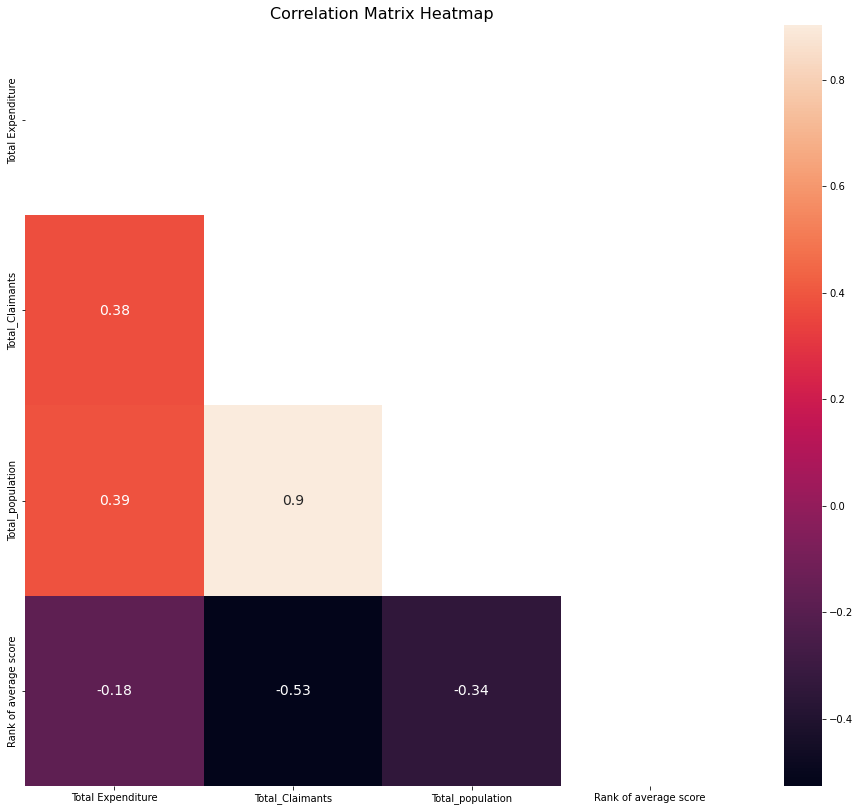

In [18]:
corr_matrix = relevant_df.corr()
fig, axs = plt.subplots(figsize=(16, 14))
half = np.zeros_like(corr_matrix)
half[np.triu_indices_from(half)] = True

# To generate diagram with specific colour and font size
sns.heatmap(corr_matrix, mask=half, annot=True, annot_kws={'size': 14})

# Title 
axs.set_title('Correlation Matrix Heatmap', fontsize=16)
plt.savefig('correlation.png')
plt.show()


In [19]:
# Check data types
print(relevant_df.dtypes)

Local authority name     object
Total Expenditure         int64
Total_Claimants           int64
Total_population          int64
Rank of average score     int64
dtype: object


## B. Data Analysis

In [22]:
x = relevant_df[['Total Expenditure', 'Total_Claimants', 'Rank of average score', 'Total_population']]

In [23]:
# Apply clustering (k-means) to identify clusters
kmeans = KMeans(n_clusters=4, random_state=42)  
relevant_df['cluster'] = kmeans.fit_predict(x)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=1, random_state=42)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=42)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9, random_state=42)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

Text(0.5, 1.0, 'Elbow Method')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

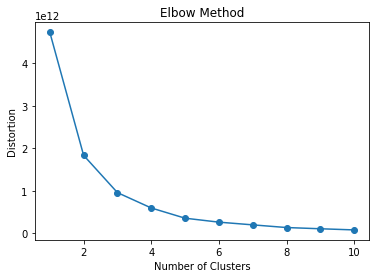

In [24]:
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)

# Plot the elbow
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.savefig("elbow.png")
plt.show()

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=42)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9, random_state=42)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

Text(0.5, 1.0, 'Silhouette Score Method')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Silhouette Score')

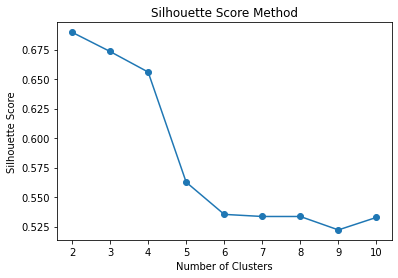

In [25]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    silhouette_scores.append(silhouette_score(x, kmeans.labels_))

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [26]:
# Save the modified DataFrame to an Excel file
relevant_df.to_excel('final_dataset.xlsx', index=False)

## C. Results

<Axes: xlabel='Rank of average score', ylabel='Total_Claimants'>

Text(0.5, 1.0, 'Clustered Data Points')

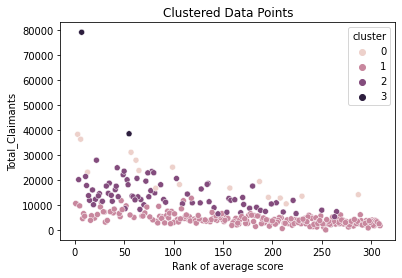

In [27]:
 # Scatter Plot in Python
sns.scatterplot(x='Rank of average score', y = 'Total_Claimants', hue='cluster', data=relevant_df)
plt.title('Clustered Data Points')
plt.savefig("clusters.png")
plt.show()

Text(0.5, 0, 'Rank of average score')

Text(0.5, 0.5, 'Total_Claimants')

Text(0.5, 0, 'Total_population')

Text(0.5, 0.92, '3D Scatter Plot of Clusters')

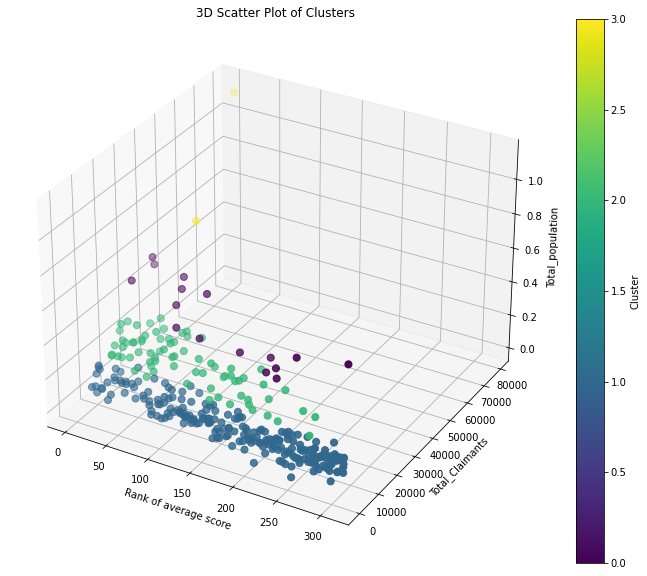

In [29]:

# Assuming 'relevant_df' is your DataFrame
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Convert 'cluster' column to categorical
relevant_df['cluster'] = pd.Categorical(relevant_df['cluster'])

# Scatter plot of the data points with clusters
scatter = ax.scatter(relevant_df['Rank of average score'], relevant_df['Total_Claimants'], 
                     relevant_df['Total_population'], c=relevant_df['cluster'].cat.codes, cmap='viridis', s=50)

# Add labels
ax.set_xlabel('Rank of average score')
ax.set_ylabel('Total_Claimants')
ax.set_zlabel('Total_population')

# Add a colorbar
fig.colorbar(scatter, ax=ax, label='Cluster')

plt.title('3D Scatter Plot of Clusters')
plt.savefig("3d plot.png")
plt.show()


In [31]:
specific_df = pd.read_excel('final_dataset.xlsx', sheet_name="Sheet2")
specific_df.head()

,Local authority name,Total Expenditure,Total_Claimants,Total_population,Rank of average score,cluster,%_claimants_totalpopn,Exp_per_claimant
0,East Cambridgeshire,13224,2480,88100,268,1,0.028150,533.225806
1,Harborough,1156,1634,98300,303,1,0.016623,70.746634
2,Lancaster,2825,4597,142200,88,1,0.032328,61.453122
3,Hackney,4101,27896,260000,22,2,0.107292,14.701032
4,Southend-on-Sea,1950,8435,180600,108,1,0.046705,23.117961


<Axes: xlabel='%_claimants_totalpopn', ylabel='Exp_per_claimant'>

Text(0.5, 0, '% of claimants in total_popn')

Text(0, 0.5, 'Amount per claimant')

Text(0.5, 1.0, 'Metrics across Selected Authorities')

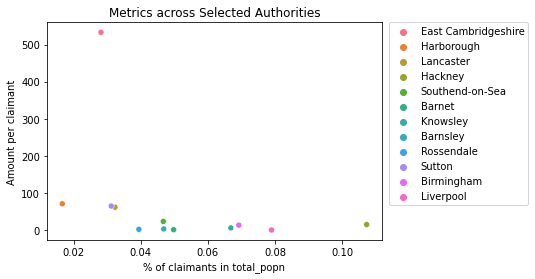

In [34]:
# visualisations

cluster_1_data = specific_df[specific_df['cluster'] == 1]
sns.scatterplot(x='%_claimants_totalpopn', y = 'Exp_per_claimant', hue = 'Local authority name', data=specific_df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.xlabel('% of claimants in total_popn')
plt.ylabel('Amount per claimant')
plt.title('Metrics across Selected Authorities')
plt.savefig("comparison_selected.png")
plt.show()